# Analisis de Ciudades

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
def min_threshold(df, threshold):
    '''Funcion para filtrar por una minima cantidad de datos'''
    return df["id"].count() > threshold

#Filtro la informacion a ciudades de mas de 400 propiedades

df['ciudad'].value_counts()
df = df.groupby('ciudad').filter(min_threshold, threshold = 400)

In [5]:
df['ciudad'].value_counts()

Querétaro                      12646
Benito Juárez                  11014
Zapopan                        10360
San Luis Potosí                 7925
Mérida                          7162
                               ...  
Lerma                            459
Irapuato                         449
Santiago                         444
Soledad de Graciano Sánchez      420
Huehuetoca                       418
Name: ciudad, Length: 93, dtype: int64

In [6]:
df['tipodepropiedad'].value_counts()

Casa                             128461
Apartamento                       56399
Casa en condominio                17903
Terreno                            8670
Local Comercial                    2832
Oficina comercial                  1701
Edificio                           1299
Bodega comercial                   1290
Terreno comercial                  1193
Casa uso de suelo                   669
Duplex                              320
Villa                               224
Quinta Vacacional                   211
Inmuebles productivos urbanos       182
Local en centro comercial           161
Departamento Compartido             139
Otros                               124
Nave industrial                      60
Rancho                               53
Terreno industrial                   24
Huerta                               10
Lote                                  4
Garage                                1
Name: tipodepropiedad, dtype: int64

In [7]:
df["fecha_publicacion"] = pd.to_datetime(df["fecha"])
df["año_publicacion"] = df["fecha_publicacion"].dt.year
df["mes_publicacion"] = df["fecha_publicacion"].dt.month

In [8]:
fechas = df.groupby(['año_publicacion', 'mes_publicacion']).agg({'mes_publicacion': 'size'})
fechas = fechas.rename(columns = {'mes_publicacion':'publicaciones'})
fechas = fechas.reset_index().pivot(index="año_publicacion", columns = "mes_publicacion", values = "publicaciones")
fechas


mes_publicacion,1,2,3,4,5,6,7,8,9,10,11,12
año_publicacion,,,,,,,,,,,,
2012,1349,1181,979,1280,1630,1354,1729,3389,2339,2930,1463,1250
2013,1758,1272,1577,1639,1840,1817,2324,2149,3059,3660,3647,2870
2014,2083,2278,2677,2575,2854,2839,2892,3249,3661,3535,4356,4393
2015,4010,3572,3689,3560,3469,3566,3691,4281,4576,5271,4615,4102
2016,5442,4338,4772,6096,5108,6280,5618,6048,5542,6272,5661,26500


## ¿Existe crecimiento anual? ¿Existe alguna epoca del año de mayor flujo de propiedades?

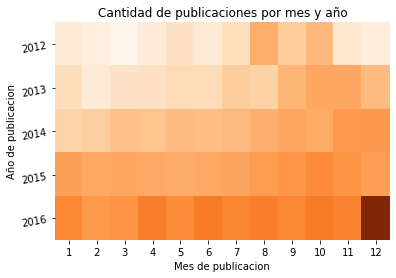

In [9]:
log_norm = LogNorm(vmin=fechas.min().min(), vmax=fechas.max().max())

ax = sns.heatmap(fechas, cmap="Oranges", norm=log_norm, cbar = False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=10)
plt.title("Cantidad de publicaciones por mes y año")
plt.xlabel("Mes de publicacion")
plt.ylabel("Año de publicacion")
ax.set_ylim(5.0, 0)
plt.savefig("figs/heatmap_fechas.png")
plt.show()

## Ciudades - Antiguedad

In [10]:
antiguedades = df.groupby('ciudad').agg({'antiguedad': 'mean', 'ciudad': 'size'})
antiguedades.rename(columns = {'antiguedad' : 'antiguedad_promedio','ciudad':'cantidad_de_propiedades'}, inplace = True)
antiguedades.sort_values('antiguedad_promedio', ascending = False)
# Antiguedades promedio, ciudades +- viejas

,antiguedad_promedio,cantidad_de_propiedades
ciudad,,
Gustavo A. Madero,16.052927,3141
Iztacalco,15.459001,1207
Coyoacán,15.118539,5293
Venustiano Carranza,14.882995,1457
Nezahualcóyotl,14.783756,1055
...,...,...
San Pedro Cholula,2.260391,1029
Los Cabos,1.439516,759
San Andrés Cholula,1.389117,3805


In [11]:
grandes_ciudades = df.groupby('ciudad').filter(min_threshold, threshold = 7000)
antiguedades_ciudades = grandes_ciudades.groupby(['ciudad', 'antiguedad']).agg({'ciudad':'size'})
antiguedades_ciudades = antiguedades_ciudades.rename(columns = {'ciudad':'cantidades'}).reset_index()
antiguedades_ciudades = antiguedades_ciudades.reset_index().pivot('ciudad', 'antiguedad', 'cantidades')

## ¿Como fue el crecimiento de las ciudades mas grandes a lo largo del tiempo?

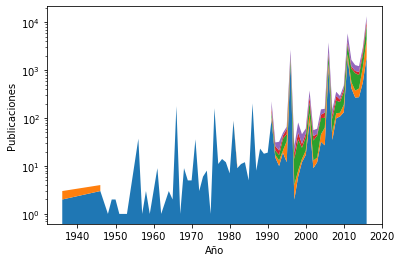

In [14]:
ax = plt.stackplot(list(map(lambda x:2016-x, list(antiguedades_ciudades.columns))),antiguedades_ciudades)
plt.yscale('log')
plt.xlabel('Año')
plt.ylabel('Publicaciones')
plt.show()

# Horrible este plot, meu deus

## ¿Existen patrones para cantidad de habitaciones por ciudad?

In [20]:
habitaciones = df.groupby(['ciudad','habitaciones']).agg({'habitaciones':'size', 'precio':'mean'})
habitaciones

habitaciones        precio
ciudad             habitaciones                            
Acapulco de Juárez 1.0                    109  1.185437e+06
                   2.0                    754  1.374582e+06
                   3.0                   1078  2.791943e+06
                   4.0                    315  5.201431e+06
                   5.0                     61  3.336639e+06
...                                       ...           ...
Zapopan            5.0                    199  3.966445e+06
                   6.0                     37  3.240405e+06
                   7.0                     17  3.451176e+06
                   8.0                      8  5.236250e+06
                   10.0                     5  4.469000e+06

[789 rows x 2 columns]